# Function Transformation
Transformation of data by using mathematical functions:
- If you have non-normal distribution data
- If your data pattern is very high
- Want to change the units of data

#### Pros: 
It can be used multiple times on a same data to meet need like getting normally distributed data and wide range of using functions as we can use any type of function

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../assets/csv-files/students.csv")
dataset.head(4)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu
3,100003,Student3,F,53.0,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,NaN


In [3]:
dataset.isnull().sum()

Roll No                0
Name                   0
Gender                40
Age                   41
Faculty               54
Level                105
Program               99
Year                  51
Year of Study        105
GPA                   54
Enrollment Status     59
Phone Number          56
Email                 55
dtype: int64

In [4]:
# Lets drop all the rows with null values in Age column
dataset["Age"].dropna(axis=0, inplace=True)

C:\Users\kusha\AppData\Local\Temp\ipykernel_10468\3953522691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Age"])


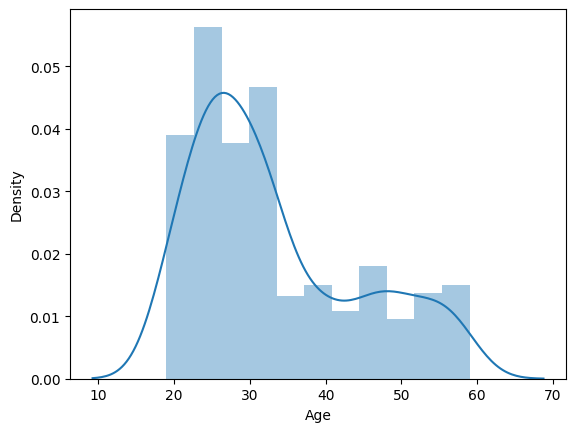

In [5]:
sns.distplot(dataset["Age"])
plt.show()

In [6]:
# The graph is not normally distributed so lets try to make it a distributed graph
# First lets check by removing outliers
q1 = dataset["Age"].quantile(0.25)
q3 = dataset["Age"].quantile(0.75)
iqr = q3 - q1

min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)
min_range, max_range

(np.float64(2.5), np.float64(62.5))

In [7]:
dataset = dataset[(dataset["Age"] >= min_range) & (dataset["Age"] <= max_range)]
dataset.head(3)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu


C:\Users\kusha\AppData\Local\Temp\ipykernel_18420\1398361985.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Age"])


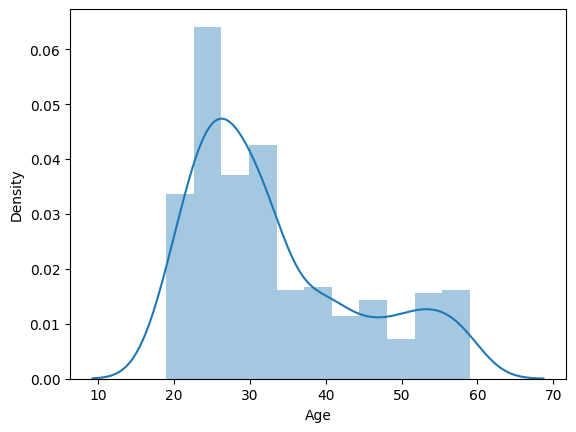

'No much progress found'

In [8]:
sns.distplot(dataset["Age"])
plt.show()

'''No much progress found'''

In [8]:
# So lets try by using Function Transformer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [9]:
ft = FunctionTransformer(func=np.log1p) #Natural logarithm of 1 + x, element-wise

In [10]:
ft.fit(dataset["Age"])

FunctionTransformer(func=<ufunc 'log1p'>)

In [11]:
dataset["Transformed Age"] = ft.transform(dataset["Age"])
dataset.head(4)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email,Transformed Age
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu,3.218876
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu,3.258097
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu,3.401197
3,100003,Student3,F,53.0,Education,Phd,Nepali,2023.0,2.0,3.47,Physical,977-9858318769,NaN,3.988984


C:\Users\kusha\AppData\Local\Temp\ipykernel_10468\3579685203.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Age"])
C:\Users\kusha\AppData\Local\Temp\ipykernel_10468\3579685203.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Transformed Age"])


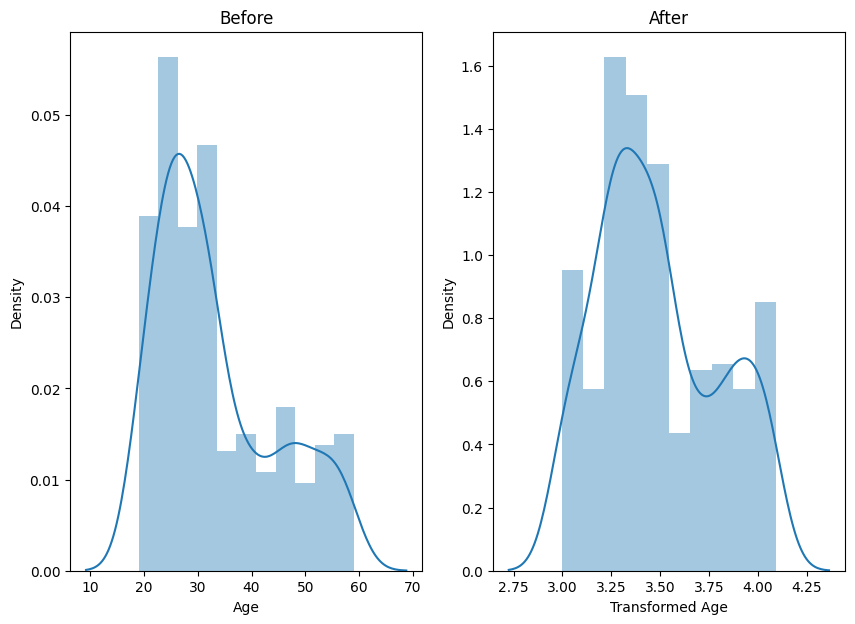

In [12]:
# For visualiztion
plt.figure(figsize=(10, 7))

# Previous data graph
plt.subplot(1, 2, 1)
plt.title("Before")
sns.distplot(dataset["Age"])

# Scaled data graph
plt.subplot(1, 2, 2)
plt.title("After")
sns.distplot(dataset["Transformed Age"])

plt.show()

In [13]:
# You can also use your own function like this
fun_transformer = FunctionTransformer(func= lambda x: x**2)
dataset["My Transformed Age"] = fun_transformer.fit_transform(dataset["Age"])
dataset.head(3)

,Roll No,Name,Gender,Age,Faculty,Level,Program,Year,Year of Study,GPA,Enrollment Status,Phone Number,Email,Transformed Age,My Transformed Age
0,100000,Student0,F,24.0,Law,Graduate,LLB,2024.0,4.0,3.10,Online,977-9889833788,student100000@university.edu,3.218876,576.0
1,100001,Student1,M,25.0,Management,Graduate,NaN,2022.0,4.0,2.77,Physical,977-9823190889,student100001@university.edu,3.258097,625.0
2,100002,Student2,F,29.0,Engineering,Phd,Electrical,2022.0,2.0,2.67,NaN,977-9826760704,student100002@university.edu,3.401197,841.0


C:\Users\kusha\AppData\Local\Temp\ipykernel_10468\1992147787.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Age"])
C:\Users\kusha\AppData\Local\Temp\ipykernel_10468\1992147787.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["My Transformed Age"])


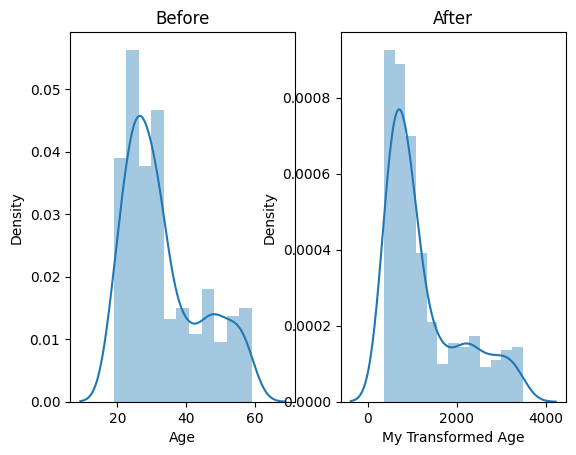

In [14]:
plt.subplot(1, 2, 1)
plt.title("Before")
sns.distplot(dataset["Age"])

# Scaled data graph
plt.subplot(1, 2, 2)
plt.title("After")
sns.distplot(dataset["My Transformed Age"])

plt.show()